In [555]:
#Libraries to import

import requests
import math
import pandas as pd
import numpy as np
from operator import itemgetter


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics


from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

import warnings
warnings.filterwarnings("ignore")



sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [556]:
#Scrape URL and get json script

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [559]:
#Check json keys

json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [560]:
#Create dataframes. Note: Game settings and total_players doesn't pull cleanly

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
events_df = pd.DataFrame(json['events'])
phases_df = pd.DataFrame(json['phases'])
element_stats_df = pd.DataFrame(json['element_stats'])

In [561]:
#View all dataframes

from IPython.display import display

display(elements_df.head())
display(elements_types_df.head())
display(teams_df.head())
display(events_df.head())
display(phases_df.head())
display(element_stats_df.head())

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,NaN,NaN,84450,0,0,-1,1,1,3,2.3,3.6,0,Granit,1.3,3,False,,None,49,84450.jpg,3.8,Xhaka,2.8,False,None,a,1,3,87,841788,52,721297,226,0.3,17.8,Xhaka,1946,3,5,8,23,0,0,0,3,0,0,7,378,434.4,500.7,336.0,127.2,23,2.20,2.95,5.15,22.37,52,21,20,15,64,42,31,22,NaN,,3.0,,NaN,,0.10,0.0,0.14,0.24,1.03,1.06,232,132,173,79,75,34,111,37,1.06,0.37
1,0.0,0.0,153256,0,0,-4,4,1,3,0.0,0.0,0,Mohamed,0.0,4,False,Knee injury - Unknown return date,2023-01-26T10:00:07.778526Z,41,153256.jpg,1.2,Elneny,0.6,False,None,i,1,3,6,197907,14,268402,54,0.0,1.5,Elneny,111,0,0,0,2,0,0,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29,477,218,429,211,553,222,479,221,NaN,,NaN,,NaN,,0.00,0.0,0.03,0.03,1.05,1.62,624,321,478,173,404,175,232,72,0.81,0.00
2,NaN,NaN,156074,0,0,-3,3,0,2,1.2,1.4,0,Rob,0.2,5,False,,None,42,156074.jpg,1.0,Holding,0.1,False,None,a,1,3,7,7060,6,18199,3,0.0,1.7,Holding,17,0,0,0,0,0,0,0,0,0,0,0,23,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28,484,172,489,177,559,222,501,177,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,1.48,0.00,595,169,333,113,440,164,432,161,0.00,0.00
3,75.0,75.0,167199,0,0,-3,3,0,3,1.3,1.8,0,Thomas,0.7,6,False,Muscle injury - 75% chance of playing,2023-02-15T22:30:09.735511Z,47,167199.jpg,3.2,Partey,0.4,False,None,d,1,3,57,99503,1,131000,48,0.1,12.1,Partey,1540,2,0,9,11,0,0,0,2,0,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46,99,42,65,53,146,91,91,62,NaN,,NaN,,NaN,,0.10,0.0,0.06,0.15,1.02,0.64,315,191,273,122,137,61,275,90,1.05,0.53
4,100.0,100.0,184029,0,0,5,-5,4,3,3.3,5.6,0,Martin,2.3,7,True,,2022-09-18T20:00:06.315087Z,70,184029.jpg,6.0,Ødegaard,38.6,False,None,a,1,3,131,5299928,1641,2716402,1375,0.3,18.7,Ødegaard,1868,8,7,8,22,0,0,0,3,0,0,21,499,572.6,744.3,600.0,191.9,22,6.02,5.37,11.43,21.91,16,6,6,5,21,12,8,6,3.0,,1.0,,NaN,,0.29,0.0,0.26,0.55,1.06,1.06,40,20,103,47,8,3,4,2,1.06,0.39


,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],78
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],254
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],322
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],92


,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1245,1285,1250,1250,1240,1320,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1070,1100,1070,1075,1070,1130,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,2,None,False,0,1035,1095,1020,1110,1050,1080,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1115,1180,1100,1160,1130,1200,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1170,1175,1140,1150,1200,1200,131


,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2022-08-05T17:30:00Z,57,True,True,7309963.0,1659720600,0,119.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 170273}, {'chip_name': '3xc', 'num_played': 348557}]",28.0,105.0,366.0,"{'id': 366, 'points': 15}",0,283.0,318.0
1,2,Gameweek 2,2022-08-13T10:00:00Z,57,True,True,3977474.0,1660384800,0,139.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 136909}, {'chip_name': 'freehit', 'num_played': 116234}, {'chip_name': 'wildcard', 'num_played': 280387}, {'chip_name': '3xc', 'num_played': 425115}]",28.0,318.0,28.0,"{'id': 28, 'points': 19}",12847501,318.0,283.0
2,3,Gameweek 3,2022-08-20T10:00:00Z,48,True,True,9105261.0,1660989600,0,118.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 118152}, {'chip_name': 'freehit', 'num_played': 150737}, {'chip_name': 'wildcard', 'num_played': 492170}, {'chip_name': '3xc', 'num_played': 309279}]",28.0,19.0,7.0,"{'id': 7, 'points': 16}",20175060,28.0,318.0
3,4,Gameweek 4,2022-08-27T10:00:00Z,62,True,True,9406675.0,1661594400,0,149.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 145393}, {'chip_name': 'freehit', 'num_played': 112828}, {'chip_name': 'wildcard', 'num_played': 380916}, {'chip_name': '3xc', 'num_played': 277947}]",28.0,225.0,279.0,"{'id': 279, 'points': 22}",16105042,283.0,28.0
4,5,Gameweek 5,2022-08-30T17:00:00Z,62,True,True,2109803.0,1661878800,0,124.0,False,False,False,False,False,"[{'chip_name': 'bboost', 'num_played': 92307}, {'chip_name': 'freehit', 'num_played': 111429}, {'chip_name': 'wildcard', 'num_played': 330787}, {'chip_name': '3xc', 'num_played': 244159}]",28.0,104.0,318.0,"{'id': 318, 'points': 17}",14741619,318.0,28.0


,id,name,start_event,stop_event
0,1,Overall,1,38
1,2,August,1,5
2,3,September,6,8
3,4,October,9,14
4,5,November,15,16


,label,name
0,Minutes played,minutes
1,Goals scored,goals_scored
2,Assists,assists
3,Clean sheets,clean_sheets
4,Goals conceded,goals_conceded


In [562]:
#Check to see basic stats of numerical columns

elements_df.describe()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,event_points,id,now_cost,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,starts,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
count,519.000000,518.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.00000,746.000000,746.000000,746.000000,746.000000,7.460000e+02,746.000000,7.460000e+02,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.00000,746.000000,746.00000,746.000000,746.00000,746.000000,746.00000,746.000000,84.000000,62.000000,55.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.00000,746.000000,746.00000,746.000000,746.00000,746.000000,746.00000,746.000000,746.000000,746.000000
mean,55.057803,55.308880,244073.773458,-0.008043,0.008043,-1.199732,1.199732,0.368633,2.573727,0.092493,373.50000,48.840483,10.432976,25.941019,25.910188,3.902485e+05,147.864611,3.902467e+05,147.864611,612.869973,0.801609,0.722520,1.979893,9.274799,0.041555,0.012064,0.016086,1.130027,0.025469,1.832440,1.998660,110.487936,6.841823,373.50000,122.985255,373.50000,122.985255,373.50000,122.985255,373.50000,122.985255,2.738095,2.241935,2.200000,0.091769,0.120054,0.053164,0.145268,1.195456,1.194611,373.50000,122.985255,373.50000,122.985255,373.50000,122.985255,373.50000,122.985255,0.608056,0.159263
std,48.452864,48.460847,158452.372450,0.146327,0.146327,1.809461,1.809461,0.793959,0.837418,0.622420,215.49594,11.059329,5.737566,26.978376,31.607725,1.015013e+06,641.718715,9.588004e+05,499.829331,694.666543,2.056464,1.489814,2.735964,10.789547,0.206316,0.131544,0.163054,1.676681,0.157651,10.670542,3.756873,135.555860,8.013188,215.49594,88.361831,215.49594,88.361831,215.49594,88.361831,215.49594,88.361831,1.423715,1.126222,1.025598,0.155554,0.629864,0.088837,0.199361,2.315340,2.412090,215.49594,88.361831,215.49594,88.361831,215.49594,88.361831,215.49594,88.361831,0.573737,0.196698
min,0.000000,0.000000,11974.000000,-1.000000,-1.000000,-8.000000,-10.000000,0.000000,1.000000,0.000000,1.00000,38.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,112480.250000,0.000000,0.000000,-2.000000,0.000000,0.000000,2.000000,0.000000,187.25000,43.000000,6.000000,7.000000,0.000000,3.365250e+03,0.000000,6.002250e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.25000,47.000000,187.25000,47.000000,187.25000,47.000000,187.25000,47.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,187.25000,47.000000,187.25000,47.000000,187.25000,47.000000,187.25000,47.000000,0.000000,0.000000
50%,100.000000,100.000000,203716.000000,0.000000,0.000

In [563]:
#Check nulls and data types

elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 88 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   chance_of_playing_next_round          519 non-null    float64
 1   chance_of_playing_this_round          518 non-null    float64
 2   code                                  746 non-null    int64  
 3   cost_change_event                     746 non-null    int64  
 4   cost_change_event_fall                746 non-null    int64  
 5   cost_change_start                     746 non-null    int64  
 6   cost_change_start_fall                746 non-null    int64  
 7   dreamteam_count                       746 non-null    int64  
 8   element_type                          746 non-null    int64  
 9   ep_next                               746 non-null    object 
 10  ep_this                               746 non-null    object 
 11  event_points       

In [564]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_con

In [565]:
#Select specific columns to slimmed down dataframes. Note: not all df's are utilized, but made availble in case of ad hoc queries or future analysis


field_df = elements_df[['id',
      'dreamteam_count', 'element_type',
        'form', 'now_cost',
       'second_name', 'selected_by_percent',
       'team', 'total_points', 'transfers_in',
       'transfers_out',
       'value_form', 'value_season', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_missed', 'yellow_cards', 'red_cards',
       'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded']]

gk_df = elements_df[[
       'dreamteam_count', 'element_type', 'form',  
       'now_cost', 
       'second_name', 'selected_by_percent',
       'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_out', 
       'value_form', 'value_season', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 'expected_assists',
       'expected_goal_involvements', 'expected_goals_conceded']]

field_per_90_df = elements_df[[
       'element_type', 'form', 'points_per_game',
       'second_name', 'selected_by_percent','team', 'team_code', 'transfers_in',
      'transfers_out', 
       'expected_goals_per_90', 'expected_assists_per_90',
       'expected_goal_involvements_per_90', 'expected_goals_conceded_per_90',
       'goals_conceded_per_90',
       'starts_per_90','clean_sheets_per_90']]

gk__per_90_df = elements_df[[
       'element_type', 'form',
       'points_per_game',
       'second_name', 'selected_by_percent', 
       'team', 'team_code', 'transfers_in','transfers_out',
       'value_season', 'saves_per_90', 'expected_assists_per_90',
       'expected_goal_involvements_per_90', 'expected_goals_conceded_per_90',
       'goals_conceded_per_90',
       'starts_per_90', 'clean_sheets_per_90']]

In [566]:
field_df

,id,dreamteam_count,element_type,form,now_cost,second_name,selected_by_percent,team,total_points,transfers_in,transfers_out,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,3,1,3,1.3,49,Xhaka,2.8,1,87,841788,721297,0.3,17.8,1946,3,5,8,23,0,0,3,0,7,378,434.4,500.7,336.0,127.2,23,2.20,2.95,5.15,22.37
1,4,1,3,0.0,41,Elneny,0.6,1,6,197907,268402,0.0,1.5,111,0,0,0,2,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29
2,5,0,2,0.2,42,Holding,0.1,1,7,7060,18199,0.0,1.7,17,0,0,0,0,0,0,0,0,0,23,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28
3,6,0,3,0.7,47,Partey,0.4,1,57,99503,131000,0.1,12.1,1540,2,0,9,11,0,0,2,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46
4,7,4,3,2.3,70,Ødegaard,38.6,1,131,5299928,2716402,0.3,18.7,1868,8,7,8,22,0,0,3,0,21,499,572.6,744.3,600.0,191.9,22,6.02,5.37,11.43,21.91
5,8,0,2,0.2,46,Tierney,0.7,1,23,75263,146479,0.0,5.0,459,0,0,1,5,0,0,0,0,0,98,75.4,57.1,45.0,17.8,4,0.26,0.26,0.51,4.16
6,9,0,3,0.0,53,Pépé,0.1,1,0,5198,36594,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00
7,10,0,2,1.0,47,White,12.8,1,90,2098618,1368500,0.2,19.1,1768,0,2,10,16,0,0,4,0,9,423,348.2,299.2,61.0,70.8,22,0.34,2.21,2.55,19.64
8,11,1,4,1.7,68,Nketiah,12.8,1,52,1913747,602340,0.3,7.6,951,4,1,2,13,0,0,2,0,5,136,186.8,95.5,565.0,83.9,9,6.75,0.74,7.49,12.69
9,12,0,3,0.0,56,Smith Rowe,0.4,1,5,25916,148669,0.0,0.9,48,0,0,0,1,0,0,0,0,0,21,15.8,36.7,18.0,6.8,0,0.09,0.19,0.28,0.60


In [567]:
#Eliminate GKs from field df and eliminate field players from GK df as well as ensure players have played minutes

field_df = field_df.loc[(field_df.element_type != 1)]
gk_df = gk_df[gk_df["element_type"].isin([1])]
field_df = field_df[field_df['minutes'] > 0]
gk_df = gk_df[gk_df['minutes'] > 0]

In [568]:
#Visual check to see if any GKs are in df

field_df

,id,dreamteam_count,element_type,form,now_cost,second_name,selected_by_percent,team,total_points,transfers_in,transfers_out,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,3,1,3,1.3,49,Xhaka,2.8,1,87,841788,721297,0.3,17.8,1946,3,5,8,23,0,0,3,0,7,378,434.4,500.7,336.0,127.2,23,2.20,2.95,5.15,22.37
1,4,1,3,0.0,41,Elneny,0.6,1,6,197907,268402,0.0,1.5,111,0,0,0,2,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29
2,5,0,2,0.2,42,Holding,0.1,1,7,7060,18199,0.0,1.7,17,0,0,0,0,0,0,0,0,0,23,3.4,0.1,0.0,0.3,0,0.00,0.00,0.00,0.28
3,6,0,3,0.7,47,Partey,0.4,1,57,99503,131000,0.1,12.1,1540,2,0,9,11,0,0,2,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46
4,7,4,3,2.3,70,Ødegaard,38.6,1,131,5299928,2716402,0.3,18.7,1868,8,7,8,22,0,0,3,0,21,499,572.6,744.3,600.0,191.9,22,6.02,5.37,11.43,21.91
5,8,0,2,0.2,46,Tierney,0.7,1,23,75263,146479,0.0,5.0,459,0,0,1,5,0,0,0,0,0,98,75.4,57.1,45.0,17.8,4,0.26,0.26,0.51,4.16
7,10,0,2,1.0,47,White,12.8,1,90,2098618,1368500,0.2,19.1,1768,0,2,10,16,0,0,4,0,9,423,348.2,299.2,61.0,70.8,22,0.34,2.21,2.55,19.64
8,11,1,4,1.7,68,Nketiah,12.8,1,52,1913747,602340,0.3,7.6,951,4,1,2,13,0,0,2,0,5,136,186.8,95.5,565.0,83.9,9,6.75,0.74,7.49,12.69
9,12,0,3,0.0,56,Smith Rowe,0.4,1,5,25916,148669,0.0,0.9,48,0,0,0,1,0,0,0,0,0,21,15.8,36.7,18.0,6.8,0,0.09,0.19,0.28,0.60
10,13,4,3,3.8,85,Saka,37.3,1,132,4859345,3023714,0.4,15.5,1984,9,9,8,23,0,0,5,0,12,454,656.4,721.6,750.0,212.8,23,7.68,4.10,11.81,22.56


In [2]:
field_df.describe().T

NameError: name 'field_df' is not defined

In [ ]:
gk_df.describe().T

In [570]:
#Create target columns and organize columns by data type

dt = field_df.dtypes
print( dt )

TARGET_A = "total_points"

id                             int64
dreamteam_count                int64
element_type                   int64
form                          object
now_cost                       int64
second_name                   object
selected_by_percent           object
team                           int64
total_points                   int64
transfers_in                   int64
transfers_out                  int64
value_form                    object
value_season                  object
minutes                        int64
goals_scored                   int64
assists                        int64
clean_sheets                   int64
goals_conceded                 int64
own_goals                      int64
penalties_missed               int64
yellow_cards                   int64
red_cards                      int64
bonus                          int64
bps                            int64
influence                     object
creativity                    object
threat                        object
i

In [571]:
#Create target columns and organize columns by data type

dt = gk_df.dtypes
print( dt )

TARGET_A = "total_points"

dreamteam_count                int64
element_type                   int64
form                          object
now_cost                       int64
second_name                   object
selected_by_percent           object
team                           int64
team_code                      int64
total_points                   int64
transfers_in                   int64
transfers_out                  int64
value_form                    object
value_season                  object
minutes                        int64
goals_scored                   int64
assists                        int64
clean_sheets                   int64
goals_conceded                 int64
own_goals                      int64
penalties_saved                int64
penalties_missed               int64
yellow_cards                   int64
red_cards                      int64
saves                          int64
bonus                          int64
bps                            int64
influence                     object
c

In [572]:
#Convert columns to float

df1 = field_df.astype({'form':'float',
 'selected_by_percent':'float',
 'value_form':'float',
 'value_season':'float',
 'influence':'float',
 'creativity':'float',
 'threat':'float',
 'ict_index':'float',
 'expected_goals':'float',
 'expected_assists':'float',
 'expected_goal_involvements':'float',
 'expected_goals_conceded':'float'})

gk_df = gk_df.astype({'form':'float',
 'selected_by_percent':'float',
 'value_form':'float',
 'value_season':'float',
 'influence':'float',
 'creativity':'float',
 'threat':'float',
 'ict_index':'float',
 'expected_goals':'float',
 'expected_assists':'float',
 'expected_goal_involvements':'float',
 'expected_goals_conceded':'float'})

In [573]:
#Check data types

dt1 = df1.dtypes
dt2 = = gk_df.dtypes
print( dt1 )
print( dt2 )

id                              int64
dreamteam_count                 int64
element_type                    int64
form                          float64
now_cost                        int64
second_name                    object
selected_by_percent           float64
team                            int64
total_points                    int64
transfers_in                    int64
transfers_out                   int64
value_form                    float64
value_season                  float64
minutes                         int64
goals_scored                    int64
assists                         int64
clean_sheets                    int64
goals_conceded                  int64
own_goals                       int64
penalties_missed                int64
yellow_cards                    int64
red_cards                       int64
bonus                           int64
bps                             int64
influence                     float64
creativity                    float64
threat      

In [1]:
#Null check

df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
#Null check

gk_df.isna().sum()

In [576]:
#Since most players are in the field, we'll do an exploratory analysis of these factors, same process can be applied to GKs

df_num = df.select_dtypes(include=["float64","int64"])
df_num.head()

,id,dreamteam_count,element_type,form,now_cost,selected_by_percent,team,total_points,transfers_in,transfers_out,value_form,value_season,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded
0,3,1,3,1.3,49,2.8,1,87,841787,721292,0.3,17.8,1946,3,5,8,23,0,0,3,0,7,378,434.4,500.7,336.0,127.2,23,2.20,2.95,5.15,22.37
1,4,1,3,0.0,41,0.6,1,6,197907,268400,0.0,1.5,111,0,0,0,2,0,0,0,0,0,27,4.6,5.4,0.0,1.1,1,0.00,0.04,0.04,1.29
3,6,0,3,0.7,47,0.4,1,57,99503,130999,0.1,12.1,1540,2,0,9,11,0,0,2,0,5,286,342.8,293.1,172.0,80.9,18,1.63,0.95,2.59,17.46
4,7,4,3,2.3,70,38.6,1,131,5299896,2716367,0.3,18.7,1868,8,7,8,22,0,0,3,0,21,499,572.6,744.3,600.0,191.9,22,6.02,5.37,11.43,21.91
9,12,0,3,0.0,56,0.4,1,5,25916,148669,0.0,0.9,48,0,0,0,1,0,0,0,0,0,21,15.8,36.7,18.0,6.8,0,0.09,0.19,0.28,0.60


In [577]:
#Find correlation with Target Flag
df_corr = df_num.corr()['total_points'][:-1]
df_corr

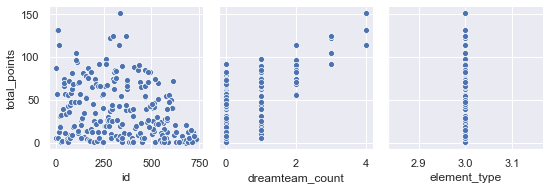

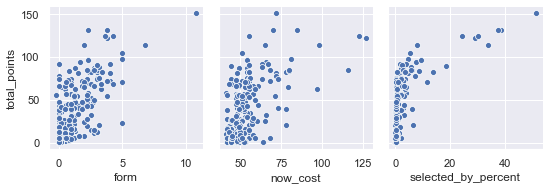

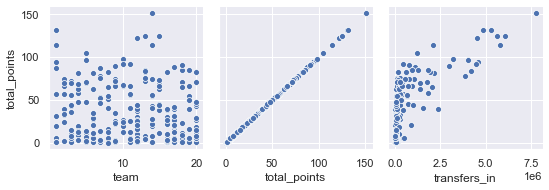

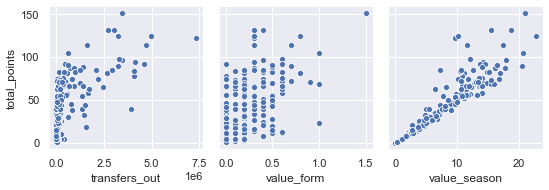

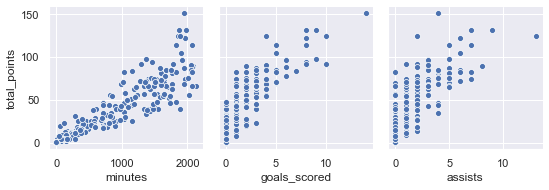

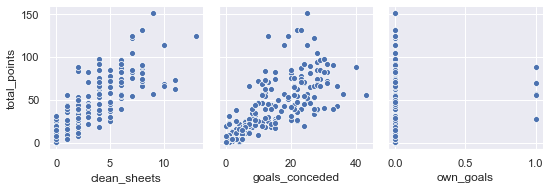

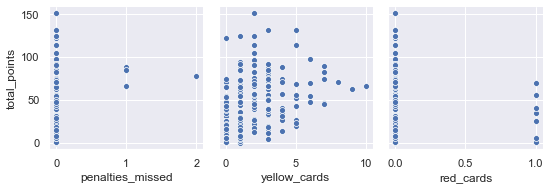

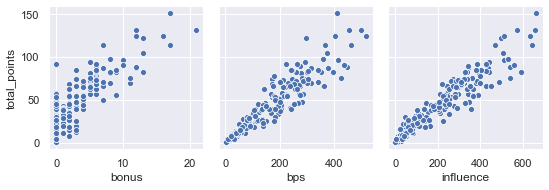

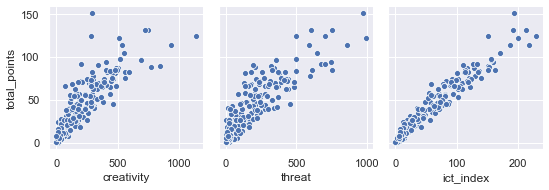

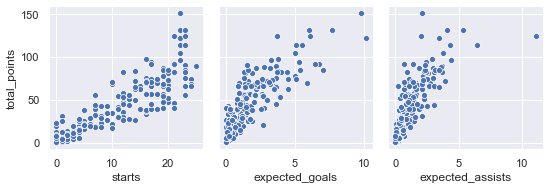

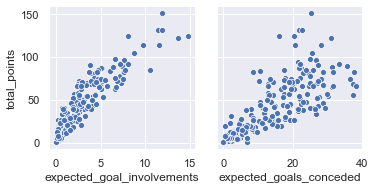

In [579]:
#Chart correlations

for i in range(0,len(df_num.columns),3):
    sns.pairplot(df_num,y_vars=['total_points'], x_vars=df_num.columns[i:i+3])

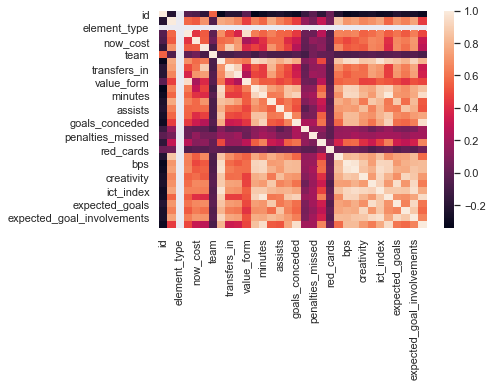

In [580]:
#Correlation heatmap

sns.heatmap(df_num.corr())

In [581]:
#Create copy to maanipulate. Number can be changed to various positions or commented if looking at GKs

df = df1[df1['element_type'] == 4]
#df = gk_df
X = df.copy()
X.head().T

,8,23,44,57,69
id,11,28,40,54,711
dreamteam_count,1,1,1,0,0
element_type,4,4,4,4,4
form,1.7,0,6.5,0,0.8
now_cost,68,79,72,42,55
second_name,Nketiah,Fernando de Jesus,Watkins,Archer,Durán
selected_by_percent,12.8,25.4,5.8,2,0
team,1,1,2,2,2
total_points,52,69,94,6,3
transfers_in,1913747,2823889,1136132,343635,2382


In [582]:
#Drop target variables and unnecessary variables

X = X.drop( 'id', axis=1 )
#X = X.drop( 'element_type', axis=1 )
#X = X.drop( 'team_code', axis=1 )

X = X.drop( 'value_form', axis=1 )
X = X.drop( 'value_season', axis=1 )
X = X.drop( 'second_name', axis=1 )

X = X.drop( TARGET_A, axis=1 )

In [583]:
#Separate target variables

Y = df[ [TARGET_A] ]

In [584]:
#Create train and test groups

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

In [589]:
"""
MODEL ACCURACY METRICS
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

def getProbAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    probs = MODEL.predict_proba( X )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_ROC_Curve( TITLE, LIST ) :
    fig = plt.figure(figsize=(6,4))
    plt.title( TITLE )
    for theResults in LIST :
        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc
        plt.plot(fpr, tpr, label = theLabel )
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def print_Accuracy( TITLE, LIST ) :
    print( TITLE )
    print( "======" )
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print( NAME, " = ", ACC )
    print( "------\n\n" )

def getAmtAccuracyScores( NAME, MODEL, X, Y ) :
    pred = MODEL.predict( X )
    MEAN = Y.mean()
    RMSE = math.sqrt( metrics.mean_squared_error( Y, pred))
    return [NAME, RMSE, MEAN]

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

def getCoefLogit( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nDEFAULT")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )


def getCoefLinear( MODEL, TRAIN_DATA ) :
    varNames = list( TRAIN_DATA.columns.values )
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_
    for coef, feat in zip(MODEL.coef_,varNames):
        coef_dict[feat] = coef
    print("\nTOTAL POINTS")
    print("---------")
    print("Total Variables: ", len( coef_dict ) )
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )

In [590]:
#DECISION TREE

WHO = "TREE"

AMT = tree.DecisionTreeRegressor( max_depth= 4 )
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )

print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( AMT, feature_cols ) 
tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


TREE_AMT = TEST_AMT.copy()

TREE RMSE ACCURACY
TREE_Train  =  2.355020154787059
TREE  =  13.228549573158949
------




In [592]:
"""
RANDOM FOREST
"""

WHO = "RF"



AMT = RandomForestRegressor(n_estimators = 100, random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_RF_amt :
    print( i )

RF_AMT = TEST_AMT.copy()


RF RMSE ACCURACY
RF_Train  =  3.9805664495470077
RF  =  6.571591457608598
------


('bps', 100)
('influence', 51)
('ict_index', 31)
('expected_goals', 20)
('goals_scored', 15)
('bonus', 14)
('transfers_in', 13)


In [593]:
"""
GRADIENT BOOSTING
"""

WHO = "GB"



AMT = GradientBoostingRegressor(random_state=1)
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( AMT, feature_cols )

for i in vars_GB_amt :
    print( i )

GB_AMT = TEST_AMT.copy()


GB RMSE ACCURACY
GB_Train  =  0.06298282089833403
GB  =  6.861924984141443
------


('bps', 100)
('ict_index', 41)
('selected_by_percent', 32)
('expected_assists', 31)
('expected_goal_involvements', 20)
('starts', 11)
('influence', 9)


In [594]:
"""
REGRESSION ALL VARIABLES
"""

WHO = "REG_ALL"

AMT = LinearRegression()
AMT = AMT.fit( W_train, Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train, Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test, Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


varNames = list( X_train.columns.values )


REG_ALL_AMT = TEST_AMT.copy()

REG_ALL RMSE ACCURACY
REG_ALL_Train  =  1.0680039633718945
REG_ALL  =  8.067087077162807
------




In [595]:
"""
REGRESSION DECISION TREE
"""

WHO = "REG_TREE"



AMT = LinearRegression()
AMT = AMT.fit( W_train[vars_tree_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[vars_tree_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[vars_tree_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

feature_cols = list( X.columns.values )
#vars_RT_amt = getTreeVars( AMT, feature_cols ) 
#tree.export_graphviz(AMT,out_file='tree_a.txt',filled=True, rounded=True, feature_names = vars_RT_amt, impurity=False, precision=0  )

#for i in vars_RT_amt :
 #   print( i )
    
REG_TREE_AMT = TEST_AMT.copy()

REG_TREE RMSE ACCURACY
REG_TREE_Train  =  3.3214974887763233
REG_TREE  =  4.4089898889716315
------




In [596]:
"""
REGRESSION RANDOM FOREST
"""

WHO = "REG_RF"


print("\n\n")
RF_amt = []
for i in vars_RF_amt :
    print(i)
    theVar = i[0]
    RF_amt.append( theVar )


AMT = LinearRegression()
AMT = AMT.fit( W_train[RF_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[RF_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[RF_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )


REG_RF_AMT_COEF = getCoefLinear( AMT, X_train[RF_amt] )


REG_RF_AMT = TEST_AMT.copy()





('bps', 100)
('influence', 51)
('ict_index', 31)
('expected_goals', 20)
('goals_scored', 15)
('bonus', 14)
('transfers_in', 13)
REG_RF RMSE ACCURACY
REG_RF_Train  =  3.5980679725730487
REG_RF  =  4.966419932971161
------



TOTAL POINTS
---------
Total Variables:  8
INTERCEPT  =  2.9016245061015837
bps  =  0.2465865444426324
influence  =  0.06239910994815529
ict_index  =  -0.04433572065958924
expected_goals  =  2.907298996053853
goals_scored  =  -4.424612757714069
bonus  =  0.656974899403725
transfers_in  =  -7.759046657012015e-07


In [597]:
"""
REGRESSION GRADIENT BOOSTING
"""

WHO = "REG_GB"

print("\n\n")
GB_amt = []
for i in vars_GB_amt :
    print(i)
    theVar = i[0]
    GB_amt.append( theVar )


AMT = LinearRegression()
AMT = AMT.fit( W_train[GB_amt], Z_train[TARGET_A] )

TRAIN_AMT = getAmtAccuracyScores( WHO + "_Train", AMT, W_train[GB_amt], Z_train[TARGET_A] )
TEST_AMT = getAmtAccuracyScores( WHO, AMT, W_test[GB_amt], Z_test[TARGET_A] )
print_Accuracy( WHO + " RMSE ACCURACY", [ TRAIN_AMT, TEST_AMT ] )

REG_GB_AMT_COEF = getCoefLinear( AMT, X_train[GB_amt] )

REG_GB_AMT = TEST_AMT.copy()




('bps', 100)
('ict_index', 41)
('selected_by_percent', 32)
('expected_assists', 31)
('expected_goal_involvements', 20)
('starts', 11)
('influence', 9)
REG_GB RMSE ACCURACY
REG_GB_Train  =  3.034548435706804
REG_GB  =  4.527245280743213
------



TOTAL POINTS
---------
Total Variables:  8
INTERCEPT  =  3.223149102057093
bps  =  0.2009380970686693
ict_index  =  0.06636955689412166
selected_by_percent  =  -0.2941923755877789
expected_assists  =  -5.547208041217935
expected_goal_involvements  =  1.1565303443373884
starts  =  0.9091789673548148
influence  =  0.009740047230360673


In [598]:
#Final evaluation of all models. REG_ALL is used as a reference point. In the future it might be used to model point projections.

ALL_AMT = [ TREE_AMT, RF_AMT, GB_AMT, REG_ALL_AMT, REG_TREE_AMT, REG_RF_AMT, REG_GB_AMT]
ALL_AMT = sorted( ALL_AMT, key = lambda x: x[1] )
print_Accuracy( "ALL TOTAL POINTS MODEL ACCURACY", ALL_AMT )

ALL TOTAL POINTS MODEL ACCURACY
REG_TREE  =  4.4089898889716315
REG_GB  =  4.527245280743213
REG_RF  =  4.966419932971161
RF  =  6.571591457608598
GB  =  6.861924984141443
REG_ALL  =  8.067087077162807
TREE  =  13.228549573158949
------


